# Вариант 11
## Егоров Алексей БПМ214

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys

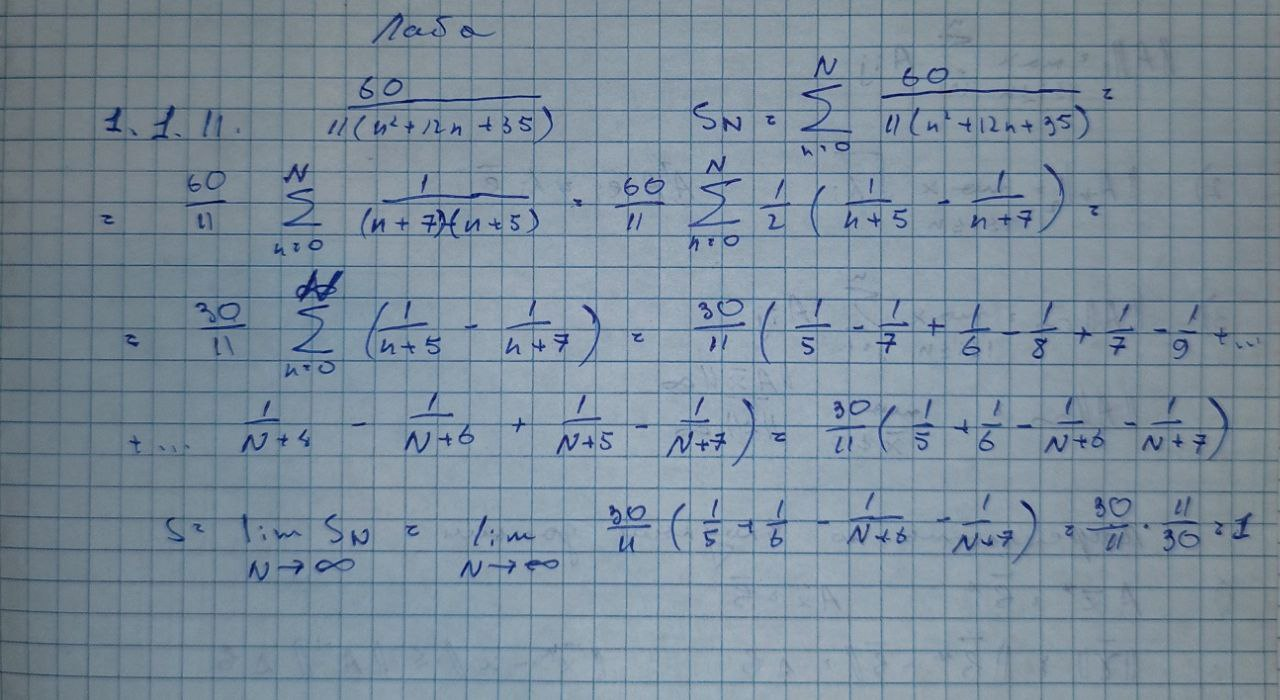

### 1.1.11

a*			 погрешность		число значащих цифр
0.6691176470588235 	 0.3308823529411765 	 0
0.9487824818454337 	 0.05121751815456632 	 1
0.9945806787872563 	 0.0054193212127436885 	 2
0.9994548997683389 	 0.0005451002316610998 	 3
0.9999454580906947 	 5.454190930531677e-05 	 4


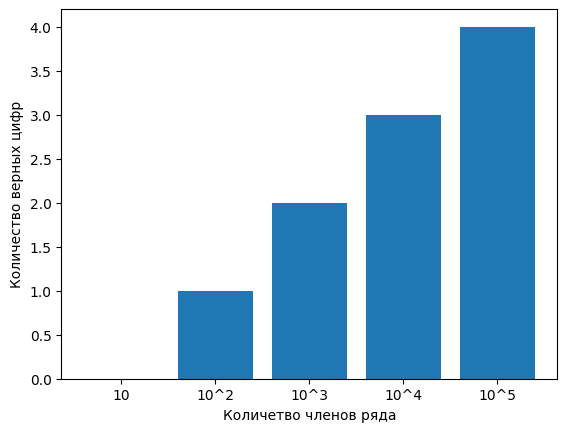

In [5]:
def S(N):
    '''
      Функция принимает натуральное число N,
      возвращает сумму N первых членов ряда  
      60/(11*(n*n+12*n+35))
    '''
    s = 0
    for n in range(N+1):
        s+= 60/(11*(n*n+12*n+35))
    return s


def digit(a_calc, err):
    '''
        Функция принимает два массива одинаковой длины:
        массив вычисленных значений и массив абсолютных погрешностей.
        Возвращает массив с количеством верных цифр для соотвествующего
        вычисленного значения и погрешности
    '''
    n = len(str(int(a_calc))) - 1
    m_digit = 10**n
    m = 0
    while m_digit > err:
        m+=1
        m_digit *= 0.1
    return m - 1


a_curr = 1 #вычислили сумму ряда аналитически

Ns = [10, 100, 1000, 10000, 100000]

abs_errs = []
as_calc = []

for N in Ns:
    a_calc = S(N)
    as_calc.append(a_calc) #список приближенных значений для каждого N
    abs_err = abs(a_curr - a_calc)
    abs_errs.append(abs_err) #список абсолютных погрешностей для каждого N
 
digits = [] #список количества верных цифр для каждой пары приближенного значения и соответствующей абсолютной погрешности
for a, err in zip(as_calc, abs_errs):
    digits.append(digit(a, err))

plt.bar(['10', '10^2', '10^3', '10^4', '10^5'], digits)
plt.xlabel('Количетво членов ряда')
plt.ylabel('Количество верных цифр')


print('a*\t\t\t погрешность\t\tчисло значащих цифр')
for i in range(5):
    print(as_calc[i],'\t', abs_errs[i],'\t', digits[i])

Можно видеть, что с увеличением количества суммируемых членов ряда абсолютная погрешность уменьшается, то есть а* приближенное значение приближается к а точному. Также с увеличением количества суммируемых членов ряда в 10 раз количество верных цифр числа а* увеличивается на 1

### 1.4.3

In [6]:
m = np.matrix('1.8 4 0 1.9;20.9 37 -25 19.2; 0.5 3 5 1.1;10.6 16 -20 8.9') #исходная матрица

rg_curr = np.linalg.matrix_rank(m) #ранг исходной матрицы
det_curr = np.linalg.det(m) #определитель исходной матрицы
print("Для исходной матрицы:")
print(f'Ранг: {rg_curr}, Определитель: {det_curr}')
#а
m1 = [[1.8 * 1.0001, 4, 0, 1.9], [20.9, 37, -25, 19.2], #внесём погрешность 0.1% в элемент а11
     [0.5, 3, 5, 1.1], [10.6, 16, -20, 8.9]]
rg_calc1 = np.linalg.matrix_rank(m1) #ранг матрицы со внесенной погрешностью в а11
det_calc1 = np.linalg.det(m1) #определитель матрицы со внесенной погрешностью в а11
print("Для матрицы после внесения погрешности 0.1% в первый элемент:")
print(f'Ранг: {rg_calc1}, Определитель: {det_calc1}')

# m2 = m * 1.0001
m2 = [[1.8 * 1.0001, 4 * 1.0001, 0 * 1.0001, 1.9 * 1.0001], [20.9 * 1.0001, 37 * 1.0001, -25 * 1.0001, 19.2 * 1.0001], #внесём погрешность 0.1% в элемент а11
     [0.5 * 1.0001, 3 * 1.0001, 5 * 1.0001, 1.1 * 1.0001], [10.6 * 1.0001, 16 * 1.0001, -20 * 1.0001, 8.9 * 1.0001]]
rg_calc2 = np.linalg.matrix_rank(m2) #ранг матрицы со внесенной погрешностью во все элементы
det_calc2 = np.linalg.det(m2) #определитель матрицы со внесенной погрешностью во все элементы
print("Для матрицы после внесения погрешности 0.1% во все элементы:")
print(f'Ранг: {rg_calc2}, Определитель: {det_calc2}')

Для исходной матрицы:
Ранг: 2, Определитель: 0.0
Для матрицы после внесения погрешности 0.1% в первый элемент:
Ранг: 3, Определитель: 8.153477892854097e-17
Для матрицы после внесения погрешности 0.1% во все элементы:
Ранг: 2, Определитель: 0.0


In [38]:
#Вариант 2

def ranks_matrix(m, delta): 
    #функция вычисляет все варианты рангов матрицы
    #при внесении погрешности delta или -delta в каждый из элементов
    rangs = []
    for i in range(65536):
        flags = my_bin(i, 16)
        mt = m.copy()
        if flags[0] == 0:
            mt.getA()[0][0] *= 1 - delta
        else:
            mt.getA()[0][0] *= 1 + delta

        if flags[1] == 0:
            mt.getA()[0][1] *= 1 - delta
        else:
            mt.getA()[0][1] *= 1 + delta

        if flags[2] == 0:
            mt.getA()[0][2] *= 1 - delta
        else:
            mt.getA()[0][2] *= 1 + delta
            
        if flags[3] == 0:
            mt.getA()[0][3] *= 1 - delta
        else:
            mt.getA()[0][3] *= 1 + delta

        if flags[4] == 0:
            mt.getA()[1][0] *= 1 - delta
        else:
            mt.getA()[1][0] *= 1 + delta

        if flags[5] == 0:
            mt.getA()[1][1] *= 1 - delta
        else:
            mt.getA()[1][1] *= 1 + delta

        if flags[6] == 0:
            mt.getA()[1][2] *= 1 - delta
        else:
            mt.getA()[1][2] *= 1 + delta
            
        if flags[7] == 0:
            mt.getA()[1][3] *= 1 - delta
        else:
            mt.getA()[1][3] *= 1 + delta

        if flags[8] == 0:
            mt.getA()[2][0] *= 1 - delta
        else:
            mt.getA()[2][0] *= 1 + delta

        if flags[9] == 0:
            mt.getA()[2][1] *= 1 - delta
        else:
            mt.getA()[2][1] *= 1 + delta

        if flags[10] == 0:
            mt.getA()[2][2] *= 1 - delta
        else:
            mt.getA()[2][2] *= 1 + delta
            
        if flags[11] == 0:
            mt.getA()[2][3] *= 1 - delta
        else:
            mt.getA()[2][3] *= 1 + delta
        
        if flags[12] == 0:
            mt.getA()[3][0] *= 1 - delta
        else:
            mt.getA()[3][0] *= 1 + delta
        
        if flags[13] == 0:
            mt.getA()[3][1] *= 1 - delta
        else:
            mt.getA()[3][1] *= 1 + delta
        
        if flags[14] == 0:
            mt.getA()[3][2] *= 1 - delta
        else:
            mt.getA()[3][2] *= 1 + delta
            
        if flags[15] == 0:
            mt.getA()[3][3] *= 1 - delta
        else:
            mt.getA()[3][3] *= 1 + delta
        
        rangs.append(np.linalg.matrix_rank(mt))
    return rangs

In [41]:
m_other = np.matrix('1.8 4 0 1.9;20.9 37 -25 19.2; 0.5 3 5 1.1;10.6 16 -20 8.9')
ra = ranks_matrix(m_other, 0.001)
unique_ranks = list(set(ra))
unique_ranks

[2, 3, 4]

Ранг исходной матрицы равен 2, а определитель 0. После внесения погрешности в первый элемент, определитель стал отличен от нуля и ранг стал равен 3. Но если внети одинаковое возмущение во все элементы матрицы, то определитель останется нулевым и ранг не поменяется. Это связано с тем, что данное преобразование является умножением матрицы на число, а значит, что количество линейно независимых строк не изменится, т. е. ранг останется прежним.

### 1.6

In [8]:
def continum(a):
    '''
        Функция принимает число а и возвращает минимальное число вида 2^n < a (n натуральное)
    '''
    n = 0
    x = 1
    while x < a:
        x = x * 2
        n += 1
    return n
        
def epsilon(a):
    '''
        Функция принимает число а и возвращает минимальное число вида 2^n < a (n натуральное)
    '''
    k = 0
    while a != 1:
        a = a * 2
        k -= 1
    return k

In [42]:
print('Одинарная точность:')
print(f'Машинный ноль: 2^{np.finfo(np.single).minexp}')
print(f'Машинное эпсилон: 2^{epsilon(np.finfo(np.single).eps)}') 
print(f'Машинный максимум: 2^{continum(np.finfo(np.single).max)}\n') 
print('Двойная точность:')
print(f'Машинный ноль: 2^{np.finfo(np.double).minexp}') 
print(f'Машинное эпсилон: 2^{epsilon(np.finfo(np.double).eps)}') 
print(f'Машинный максимум: 2^{continum(np.finfo(np.double).max)}\n') 
print('Расширенная точность:')
print(f'Машинный ноль: 2^{np.finfo(np.longdouble).minexp}')
print(f'Машинное эпсилон: 2^{epsilon(np.finfo(np.longdouble).eps)}')
print(f'Машинный максимум: 2^{continum(np.finfo(np.longdouble).max)}')

Одинарная точность:
Машинный ноль: 2^-126
Машинное эпсилон: 2^-23
Машинный максимум: 2^128

Двойная точность:
Машинный ноль: 2^-1022
Машинное эпсилон: 2^-52
Машинный максимум: 2^1024

Расширенная точность:
Машинный ноль: 2^-1022
Машинное эпсилон: 2^-52
Машинный максимум: 2^1024


Рассмотрим машинный ноль, машинный эпсилон и машинную бесконечность на C++ для типов 

**float** (режим ординарной точности), 

**double** (режим двойной точности),

**long double** (режим расширенной точности)

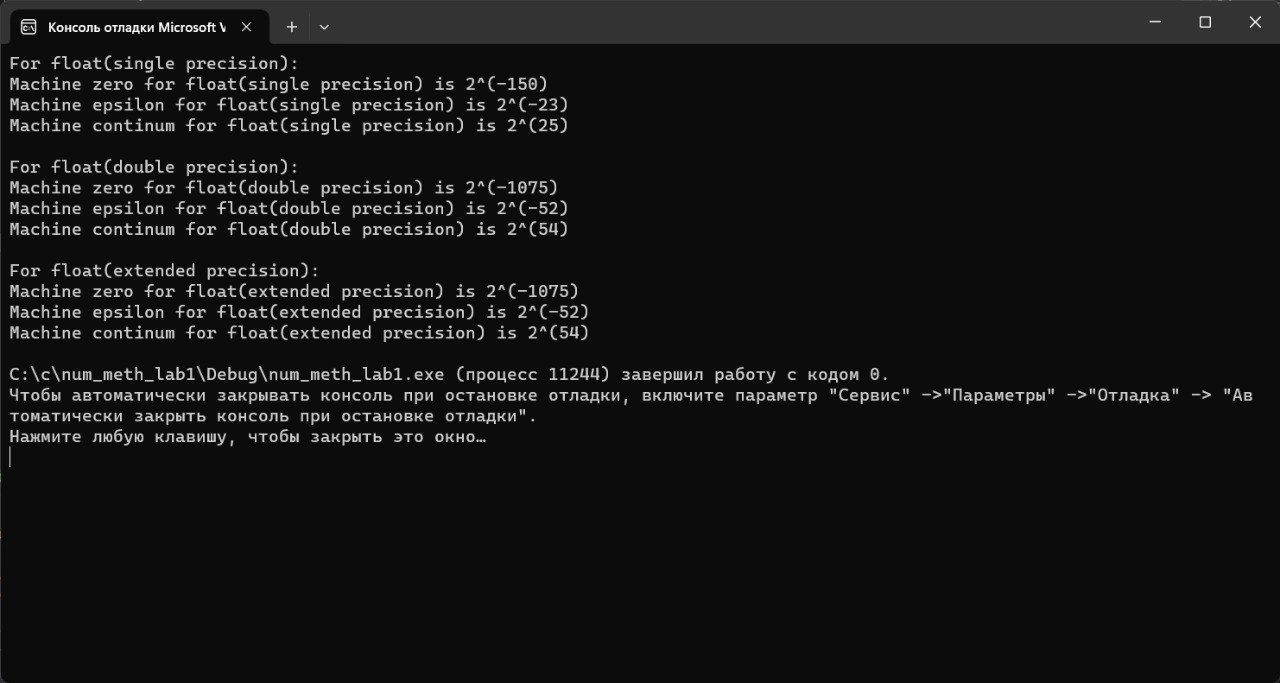

### 1.9.5

In [10]:
def my_bin(num : np.int64, N : np.int8): 
    #Функция по вводимому натуральному числу возвращает массив длины N (если длина получившегося представления меньше 8, то 
    #массив с начала заполняется 0) его двоичного представления
    arr = np.full(N, 0, dtype=np.int8)
    pos = N - 1
    
    while num > 0:
        
        if num % 2 != 0:
            arr[pos] = 1
            
        num = num // 2
        pos -= 1
    return arr


def error_matrix(m, delta): 
    #функция вычисляет все варианты определителей матрицы
    #при внесении погрешности delta или -delta в каждый из элементов
    dets = []
    for i in range(512):
        flags = my_bin(i, 9)
        mt = m.copy()
        if flags[0] == 0:
            mt.getA()[0][0] *= 1 - delta
        else:
            mt.getA()[0][0] *= 1 + delta

        if flags[1] == 0:
            mt.getA()[0][1] *= 1 - delta
        else:
            mt.getA()[0][1] *= 1 + delta

        if flags[2] == 0:
            mt.getA()[0][2] *= 1 - delta
        else:
            mt.getA()[0][2] *= 1 + delta

        if flags[3] == 0:
            mt.getA()[1][0] *= 1 - delta
        else:
            mt.getA()[1][0] *= 1 + delta

        if flags[4] == 0:
            mt.getA()[1][1] *= 1 - delta
        else:
            mt.getA()[1][1] *= 1 + delta

        if flags[5] == 0:
            mt.getA()[1][2] *= 1 - delta
        else:
            mt.getA()[1][2] *= 1 + delta

        if flags[6] == 0:
            mt.getA()[2][0] *= 1 - delta
        else:
            mt.getA()[2][0] *= 1 + delta

        if flags[7] == 0:
            mt.getA()[2][1] *= 1 - delta
        else:
            mt.getA()[2][1] *= 1 + delta

        if flags[8] == 0:
            mt.getA()[2][2] *= 1 - delta
        else:
            mt.getA()[2][2] *= 1 + delta
        dets.append(np.linalg.det(mt))
    return dets


In [11]:
m = np.matrix('-7 -8 -10;28.6 27.6 25;7 6 4')
alpha, beta = 0.1, 0.2
#1
print(f'Определитель исходной матрицы: {np.linalg.det(m)}')

Определитель исходной матрицы: 8.399999999999997


Определитель отличен от 0, значит, исходная матрица имеет обратную

In [12]:
#2
num1 = error_matrix(m, alpha * 0.01)
num2 = error_matrix(m, beta * 0.01)
print('Для относительной погрешности 0.1% знаяение определителя (функции 9 переменных) принимает значения в отрезке: ')
print(f'[{np.min(num1)}, {np.max(num1)}]')
print('Для относительной погрешности 0.2% знаяение определителя (функции 9 переменных) принимает значения в отрезке: ')
print(f'[{np.min(num2)}, {np.max(num2)}]')

Для относительной погрешности 0.1% знаяение определителя (функции 9 переменных) принимает значения в отрезке: 
[3.77622839160029, 13.033028408399732]
Для относительной погрешности 0.2% знаяение определителя (функции 9 переменных) принимает значения в отрезке: 
[-0.8382864672000092, 17.67531366720019]


В первом случае определитель не принимает значения 0, значит обратная матрица существует

Во втором случае 0 лежит в множестве значений определителя, следовательно с добавлением такой погрешности матрица может не иметь обратной